Riekert Holder<br>
2517888<br>
Question 1<br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 8000})'''))

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from mlxtend.preprocessing import TransactionEncoder
import plotly.express as px

## 1.1 Exploration of Netflix Data

### 1.1.1 Describe the dataset

In [4]:
netflix_df = pd.read_csv("/content/drive/MyDrive/IDVE_Exam/netflix_titles.csv")
n_df = netflix_df.copy()
netflix_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000



**Dataset description:**
*   **8807 entries with 12 columns/features**
*   **We have 2 unique types, Movies or TV Shows**
*   **8807 unique content titles**
*   **17 categories of ratings**
*   **Our content released_date has a range of 96 years**


### 1.1.2 Identify missing values and duplicates

#### Missing values

In [7]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

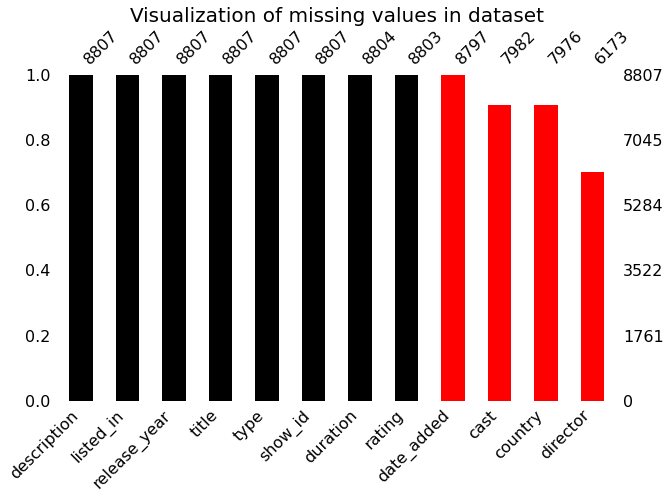

In [8]:
color = ['black','black','black','black','black','black','black','black','red','red','red','red']
missingno.bar(netflix_df, color = color, sort = 'descending', figsize = (10,6))
plt.title("Visualization of missing values in dataset",fontsize=20)
plt.show()


**We have 4307 missing entries, the missing values are in the columns:**


*   **director - 2634 missing values**
*   **cast - 825 missing values**
*   **country - 831 missing values**
*   **date_added - 10 missing dates**
*   **rating - 4 missing values**
*   **duration - 3 missing values**





#### Duplicates

In [9]:
netflix_df.duplicated().sum()

0

**There is no duplicated data in the dataset**

**We drop all nan values except for director, cast and country because they have more than 10% missing data.We will also drop show_id because it contains no useful data**

In [10]:
#netflix_df['director'].replace(np.nan,'NO DATA',inplace=True)
#netflix_df['cast'].replace(np.nan,'NO DATA',inplace=True)
#netflix_df['country'].replace(np.nan,'NO DATA',inplace=True)

netflix_df.dropna(subset=["date_added"], inplace=True)
netflix_df.dropna(subset=["rating"], inplace=True)
netflix_df.dropna(subset=["duration"], inplace=True)

In [11]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

### 1.1.4 Split between movies and TV shows

(-1.1136604528891605,
 1.111690438440619,
 -1.1167378672922192,
 1.1007970412996295)

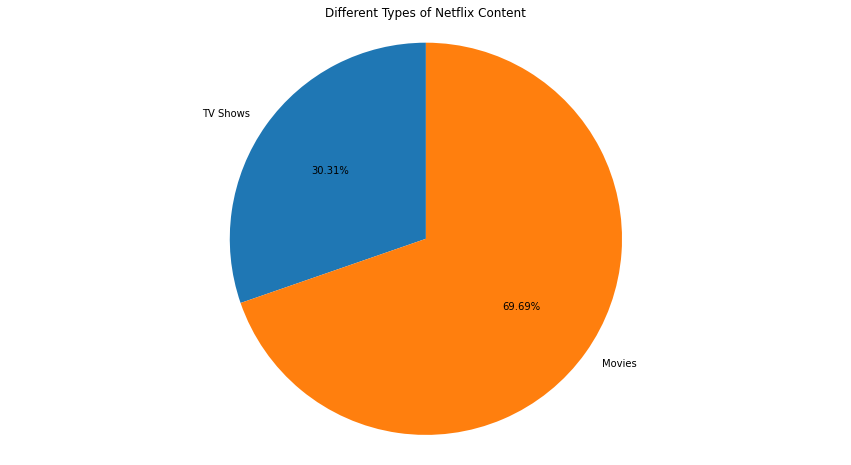

In [12]:
plt.figure(figsize=(15,8))
label=['TV Shows', 'Movies']
plt.pie(netflix_df['type'].value_counts().sort_values(), labels=label, 
        autopct='%1.2f%%', startangle=90)
plt.title('Different Types of Netflix Content')
plt.axis('equal')

**We can see from the graph above that most of netflix's content are of the type 'Movie'**

### 1.1.5 Distribution of movie duration (or number of seasons of TV shows)

In [13]:
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



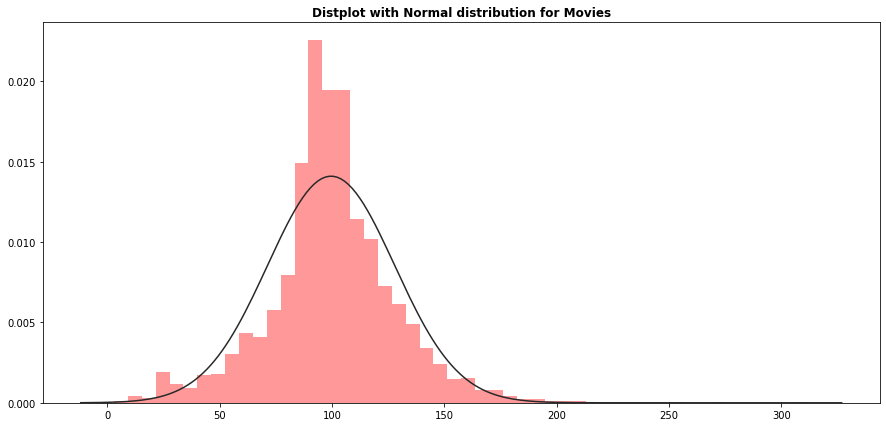

In [14]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False,color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



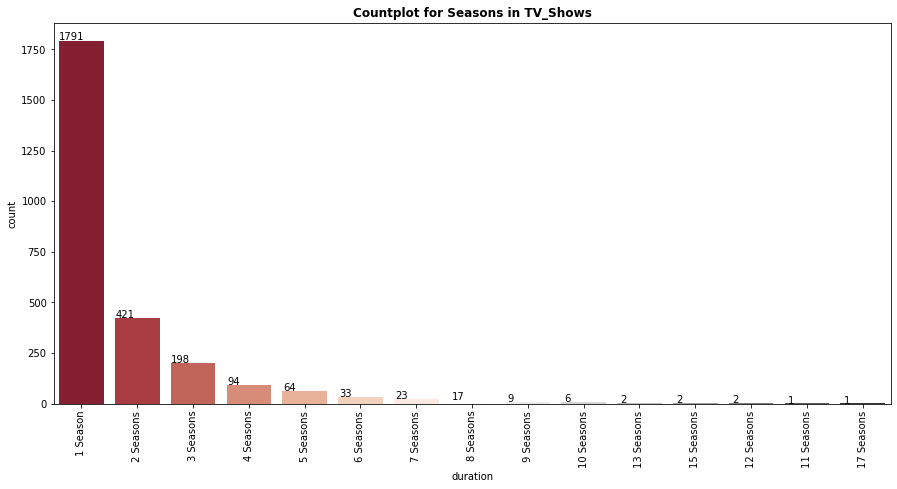

In [15]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_tv['duration'],order = df_tv['duration'].value_counts().index,palette="RdGy")
plt.title('Countplot for Seasons in TV_Shows',fontweight="bold")
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height() * 1.005)))


**Analysis:**
*    **Movies: The Distribution is Normal, the mean length of the distribution is about 90-110 minutes**
*    **Tv shows: Majority of the TV shows on netflix have 1 season.The distribution is skewed to the right and about 90% of the TV Shows have 3 seasons or fewer**

### 1.1.6 Plot of the age of content when it is released on Netflix

In [16]:
df_copy = netflix_df.copy()
df_copy["date_added"] = pd.to_datetime(df_copy["date_added"])

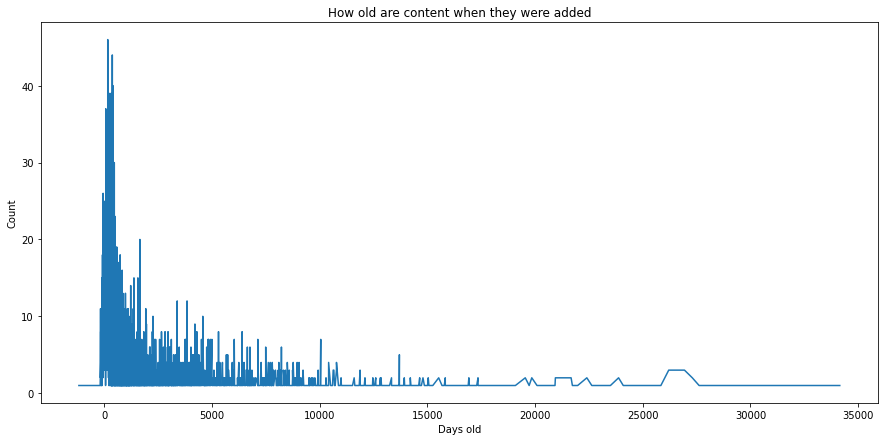

In [17]:
release_year = df_copy["release_year"].apply(lambda x: pd.Timestamp(x, 7, 1))
# now get the difference between date added and date released for each movie
df_copy["time_to_add"] = (df_copy["date_added"] - release_year).dt.days
years = df_copy.groupby("time_to_add").size()
plt.figure(figsize=(15,7))
plt.title('How old are content when they were added')
plt.xlabel('Days old')
plt.ylabel('Count')
sns.lineplot(data=years)

**We can see that the majority of all the content is less than 5000 days old before the were added to Netflix's library.**

### 1.1.7 How is it distributed by age/maturity rating? 

In [18]:
# we are using px here to see the smaller ratings too
x = netflix_df['rating'].value_counts()
fig = px.pie(values = x.values, 
             names = x.index,
             color_discrete_sequence=px.colors.sequential.Reds)
fig.show()

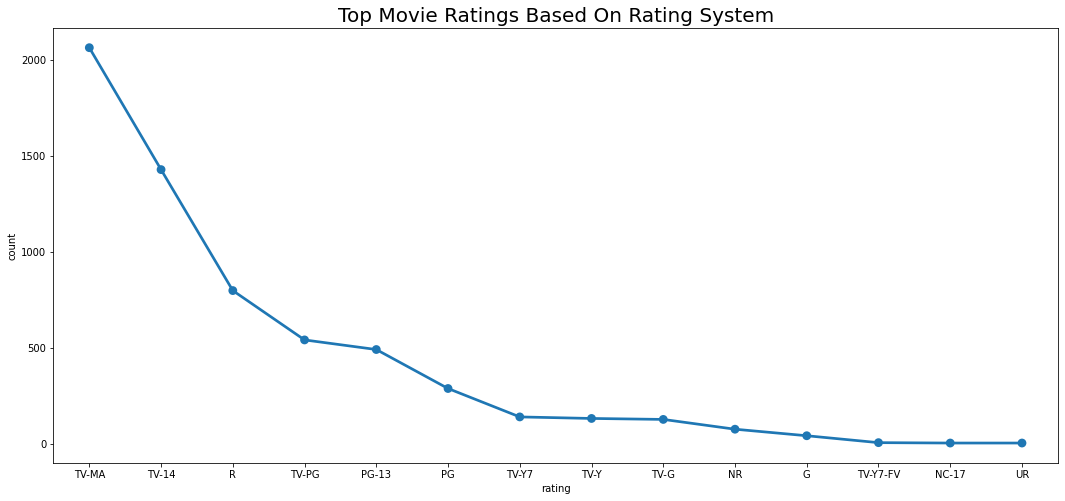

In [19]:
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movie = netflix_df[netflix_df["type"] == "Movie"]

movie_ratings = df_movie.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()


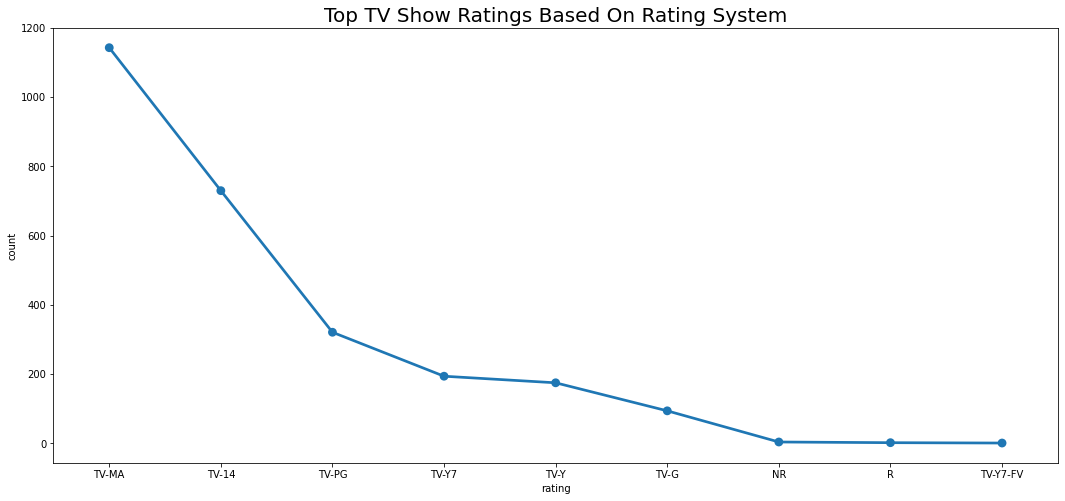

In [20]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

**The top 3 ratings for Movies and TV Shows are:**

1.   **TV-MA**
2.   **TV-14**
3.   **TV-PG**
<br>
**The top 3 ratings for Movies are:**

1.   **TV-MA**
2.   **TV-14**
3.   **R**
<br>
**The top 3 ratings for TV Shows are:**

1.   **TV-MA**
2.   **TV-14**
3.   **TV-PG**


### 1.1.8 How is it distributed by genre? Which genres are the most popular?

In [21]:
#Here we seperate multiple genres in each Movie/TV show's genre, and only keep the one that is first

genre = netflix_df['listed_in'].apply(lambda t: t.split(', '))
genre = list(genre)


encoder = TransactionEncoder().fit(genre)
onehot = encoder.transform(genre)
onehot_genre = pd.DataFrame(onehot, columns = encoder.columns_, index=netflix_df['show_id'])

genre_count = onehot_genre.sum().sort_values(ascending=False)
genre_count.head()

International Movies      2752
Dramas                    2426
Comedies                  1674
International TV Shows    1349
Documentaries              869
dtype: int64

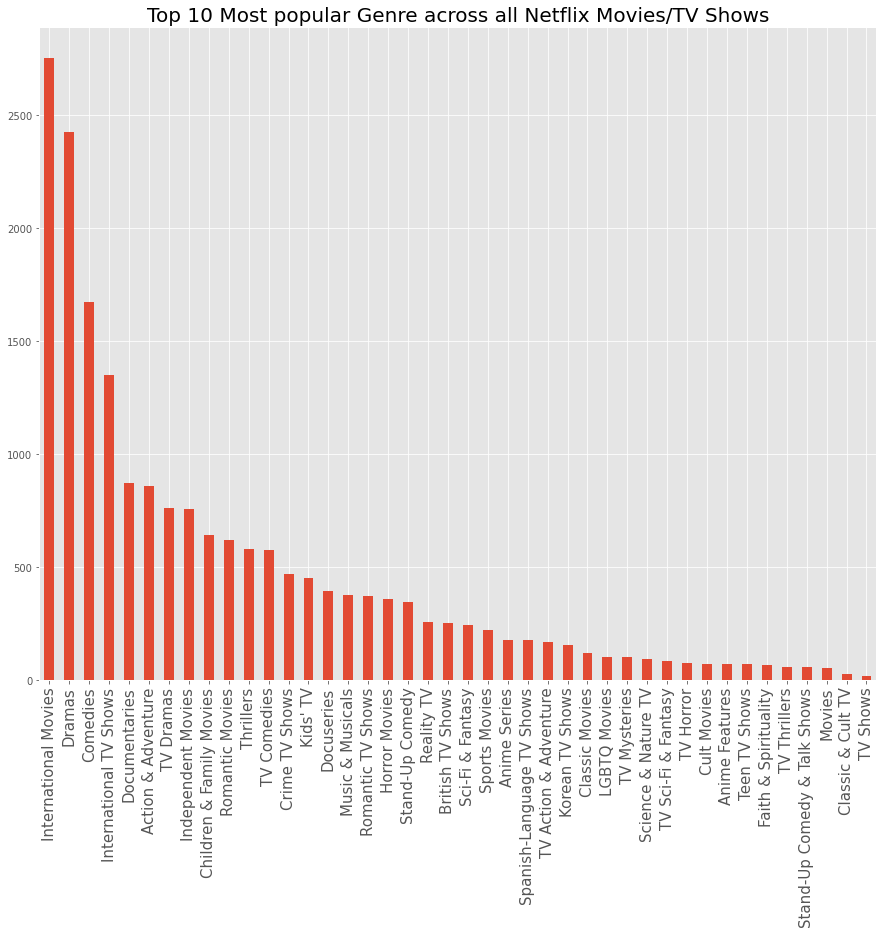

In [22]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 12))
genre_count.plot(kind='bar')
plt.xticks(rotation='90')
plt.tick_params(axis='x', labelsize=15)
plt.title('Top 10 Most popular Genre across all Netflix Movies/TV Shows', fontsize=20)
plt.show()

**Most popular genre counts across Netflix:**
1.   **International Movies - 2752**
2.   **Dramas - 2426**
3.   **Comedies - 1674**



### 1.1.9 Are TV shows or movies added more regularly?

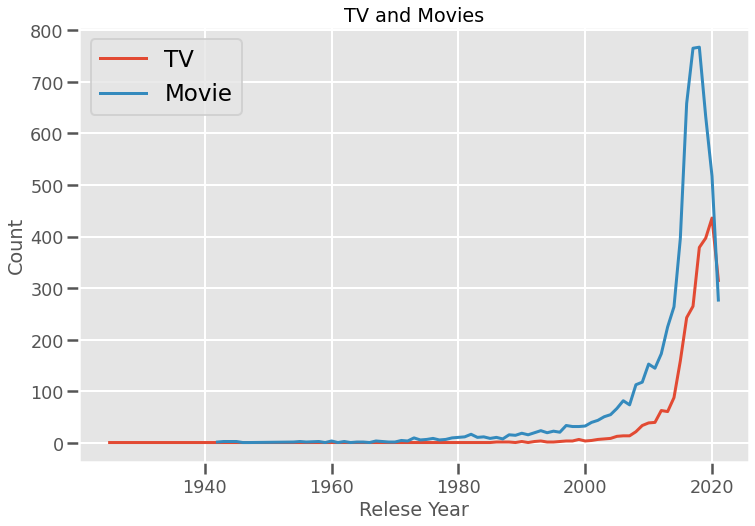

In [23]:
df_tv = netflix_df[netflix_df['type'] == 'TV Show'].groupby('release_year').count()
df_movies = netflix_df[netflix_df['type'] == 'Movie'].groupby('release_year').count()

plt.figure(figsize=(12,8))
sns.set_context('poster', font_scale=0.8)
sns.lineplot(data = df_tv['show_id'], sizes=10)
sns.lineplot(data = df_movies['show_id'])
plt.ylabel('Count')
plt.xlabel('Relese Year')
plt.legend(['TV', 'Movie'], fontsize='large')
plt.title('TV and Movies')
plt.show()

**Movies and TV Shows were added on a regular increasing rate over the years until 2019, this may be due to the impact of Coronavirus, therefore they werent able toupload more content from 2019-2020 and it decreased drastically**

### 1.1.10 Is there a particular time of week/year when content gets uploaded?

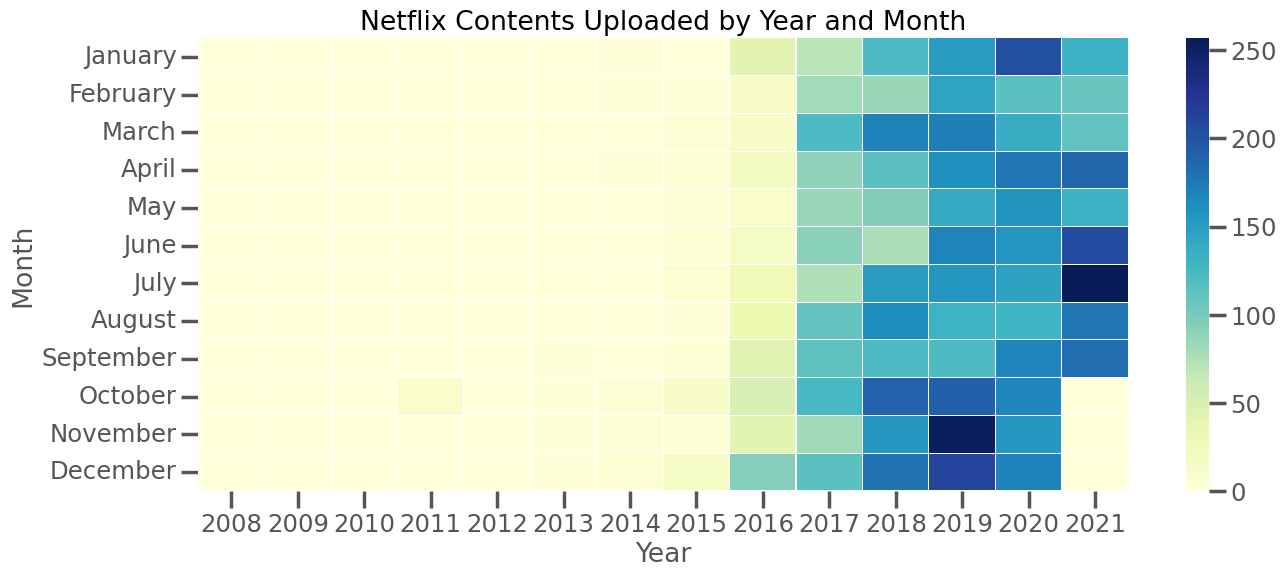

In [24]:
net_date = netflix_df[['date_added']].dropna()
net_date['Year'] = net_date.date_added.apply(lambda y : y.split(' ')[-1])
net_date['Month'] = net_date.date_added.apply(lambda y : y.split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = net_date.groupby('Year')['Month'].value_counts().unstack().fillna(0)[month_order].T


ax = plt.subplots(figsize = (15, 6), dpi=100)
plt.title('Netflix Contents Uploaded by Year and Month')
ax = sns.heatmap(df, cmap="YlGnBu", linewidths=.1)

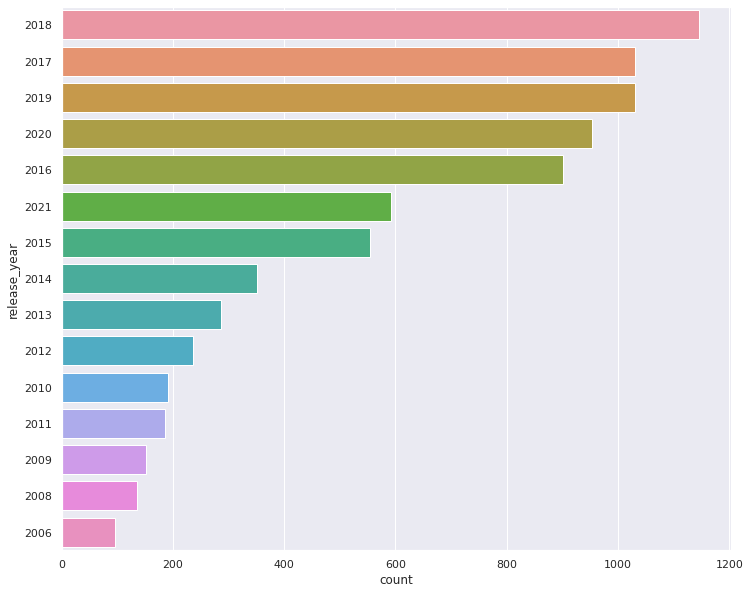

In [25]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_df, order=netflix_df['release_year'].value_counts().index[0:15])

**As the years increased we can see that more content have been added frequetly,with 2018 being the year where the most content was added.October, November and december is the months where the most content was uploaded, with December having the most uploads.This might be becuase its the time of vacation**

## 1.2 IMDB Ratings

### 1.2.1 Joining the datasets

In [26]:
#reading our data
basics_df = pd.read_csv('/content/drive/MyDrive/IDVE_Exam/title.basics_small.tsv.gz',sep='\t')
ratings_df = pd.read_csv('/content/drive/MyDrive/IDVE_Exam/title.ratings_small.tsv.gz',sep='\t')
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138070 entries, 0 to 138069
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          138070 non-null  object
 1   titleType       138070 non-null  object
 2   primaryTitle    138070 non-null  object
 3   originalTitle   138070 non-null  object
 4   isAdult         138070 non-null  int64 
 5   startYear       138070 non-null  int64 
 6   endYear         138070 non-null  int64 
 7   runtimeMinutes  138070 non-null  int64 
 8   genres          138070 non-null  object
dtypes: int64(4), object(5)
memory usage: 9.5+ MB


In [27]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114155 entries, 0 to 114154
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         114155 non-null  object 
 1   averageRating  114155 non-null  float64
 2   numVotes       114155 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ MB


In [28]:
basics_df.isna().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

In [29]:
 ratings_df.isna().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [30]:
#Merging our raings and basics datasets
rated_titles = pd.merge(basics_df.set_index('tconst'), ratings_df.set_index('tconst'), left_index=True, right_index=True).drop_duplicates()
rated_titles.shape

(114155, 10)

In [31]:
rated_titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114155 entries, tt0000004 to tt9916580
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   titleType       114155 non-null  object 
 1   primaryTitle    114155 non-null  object 
 2   originalTitle   114155 non-null  object 
 3   isAdult         114155 non-null  int64  
 4   startYear       114155 non-null  int64  
 5   endYear         114155 non-null  int64  
 6   runtimeMinutes  114155 non-null  int64  
 7   genres          114155 non-null  object 
 8   averageRating   114155 non-null  float64
 9   numVotes        114155 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 9.6+ MB


In [32]:
rated_titles.duplicated().sum()

0

In [33]:
rated_titles.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0000004,short,Un bon bock,Un bon bock,0,1892,0,12,"Animation,Short",6.0,153
tt0000020,short,The Derby 1895,The Derby 1895,0,1895,0,1,"Documentary,Short,Sport",5.0,319
tt0000023,short,The Sea,Baignade en mer,0,1895,0,1,"Documentary,Short",5.7,1293
tt0000031,short,Jumping the Blanket,Le saut à la couverture,0,1895,0,1,"Documentary,Short",5.5,936
tt0000051,short,The Bohemian Encampment,Campement de bohémiens,0,1896,0,0,"Documentary,Short",3.8,32


In [34]:
rated_titles_clean = rated_titles.copy()

net_clean = n_df[n_df['type'] == 'Movie']
net_clean.shape

(6131, 12)

In [35]:
net_clean['title']= net_clean['title'].str.lower()

rated_titles_clean['primaryTitle'] = rated_titles_clean['primaryTitle'].str.lower()
rated_titles_clean['originalTitle'] = rated_titles_clean['originalTitle'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
rated_titles_clean = rated_titles_clean[rated_titles_clean.startYear.apply(lambda x: str(x).isnumeric())]
rated_titles_clean['startYear'] = rated_titles_clean['startYear'].astype(int)
rated_titles_clean.shape

(114155, 10)

In [37]:
rated_titles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114155 entries, tt0000004 to tt9916580
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   titleType       114155 non-null  object 
 1   primaryTitle    114155 non-null  object 
 2   originalTitle   114155 non-null  object 
 3   isAdult         114155 non-null  int64  
 4   startYear       114155 non-null  int64  
 5   endYear         114155 non-null  int64  
 6   runtimeMinutes  114155 non-null  int64  
 7   genres          114155 non-null  object 
 8   averageRating   114155 non-null  float64
 9   numVotes        114155 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 9.6+ MB


In [38]:
print(net_clean.columns,"\n",rated_titles_clean.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object') 
 Index(['titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes'],
      dtype='object')


In [39]:
df = pd.merge(net_clean, rated_titles_clean, left_on=['title','release_year'], right_on=['primaryTitle','startYear'])
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
3813,s7161,Movie,kaalia,Tinnu Anand,"Amitabh Bachchan, Asha Parekh, Parveen Babi, A...",India,"December 31, 2019",1981,TV-14,173 min,"Action & Adventure, Dramas, International Movies",Jailed for robbing his brother’s unscrupulous ...,movie,kaalia,kaalia,0,1981,0,157,"Action,Drama",6.8,1514
883,s1789,Movie,nobody sleeps in the woods tonight,Bartosz M. Kowalski,"Julia Wieniawa-Narkiewicz, Michał Lupa, Wiktor...",Poland,"October 28, 2020",2020,TV-MA,103 min,"Horror Movies, International Movies","Addicted to technology, a group of teens atten...",movie,nobody sleeps in the woods tonight,w lesie dzis nie zasnie nikt,0,2020,0,102,"Horror,Thriller",4.9,10150
2281,s4568,Movie,haani,Amitoj Mann,"Sarabjit Cheema, Mahreen Kaleka, Harbhajan Man...",India,"October 1, 2018",2013,TV-14,137 min,"Dramas, International Movies, Music & Musicals",When a man discovers that he can communicate w...,movie,haani,haani,0,2013,0,138,"Family,Romance",7.1,140
1446,s2844,Movie,aurora,Cristi Puiu,"Cristi Puiu, Clara Voda, Catrinel Dumitrescu, ...","Romania, France, Switzerland, Germany","March 4, 2020",2010,TV-MA,186 min,"Dramas, International Movies","42-year-old Viorel, a distraught engineer, tak...",tvShort,aurora,aurora,0,2010,0,19,"Drama,Short",5.0,12
267,s562,Movie,austin powers in goldmember,Jay Roach,"Mike Myers, Beyoncé Knowles-Carter, Seth Green...",United States,"July 1, 2021",2002,PG-13,94 min,"Action & Adventure, Comedies",The world's most shagadelic spy continues his ...,movie,austin powers in goldmember,austin powers in goldmember,0,2002,0,94,"Action,Adventure,Comedy",6.2,203093


In [40]:
df.shape

(4884, 22)

In [41]:
df.duplicated().sum()

0

In [42]:
df.isna().sum()

show_id             0
type                0
title               0
director           97
cast              354
country           168
date_added          0
release_year        0
rating              1
duration            3
listed_in           0
description         0
titleType           0
primaryTitle        0
originalTitle       0
isAdult             0
startYear           0
endYear             0
runtimeMinutes      0
genres              0
averageRating       0
numVotes            0
dtype: int64

**After combining the movies with their ratings our data makes sense, the title columns content are the same as the primaryTitle and originalTitle columns from the imdb dataset that were merged.The runtimes from are similar in most cases, but we do have some runtime differences by 1-4 min when we compare.We also have the number of votes and the average rating for each movie**

### 1.2.2 Missing joins

### 1.2.3 Plot Ratings

In [43]:
fig = px.histogram(data_frame=df, x=df["averageRating"], title="Ratings of Netflix Movies")
fig.show()

**From the averageRating plot above we can see the data is negative skew.Therefore netflix can be seen as having a good quality library.The highest count rating is 6.5**

### 1.2.4 Plot Relationships between movie and other features

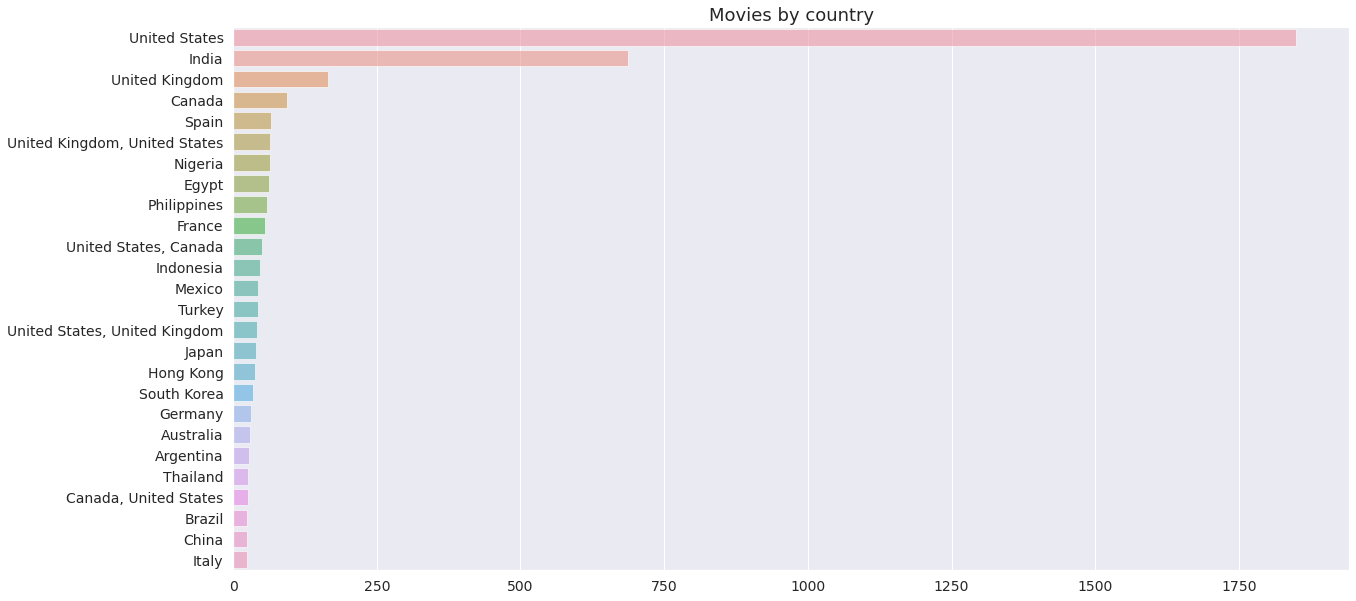

In [44]:
df_movies = df[df['type'] == 'Movie']
countries = df_movies['country'].value_counts()[df_movies['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)
plt.figure(figsize=(20,10))
plt.title('Movies by country', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

**The top 3 countries that produced the most movies are: USA, India and the united Kingdom**

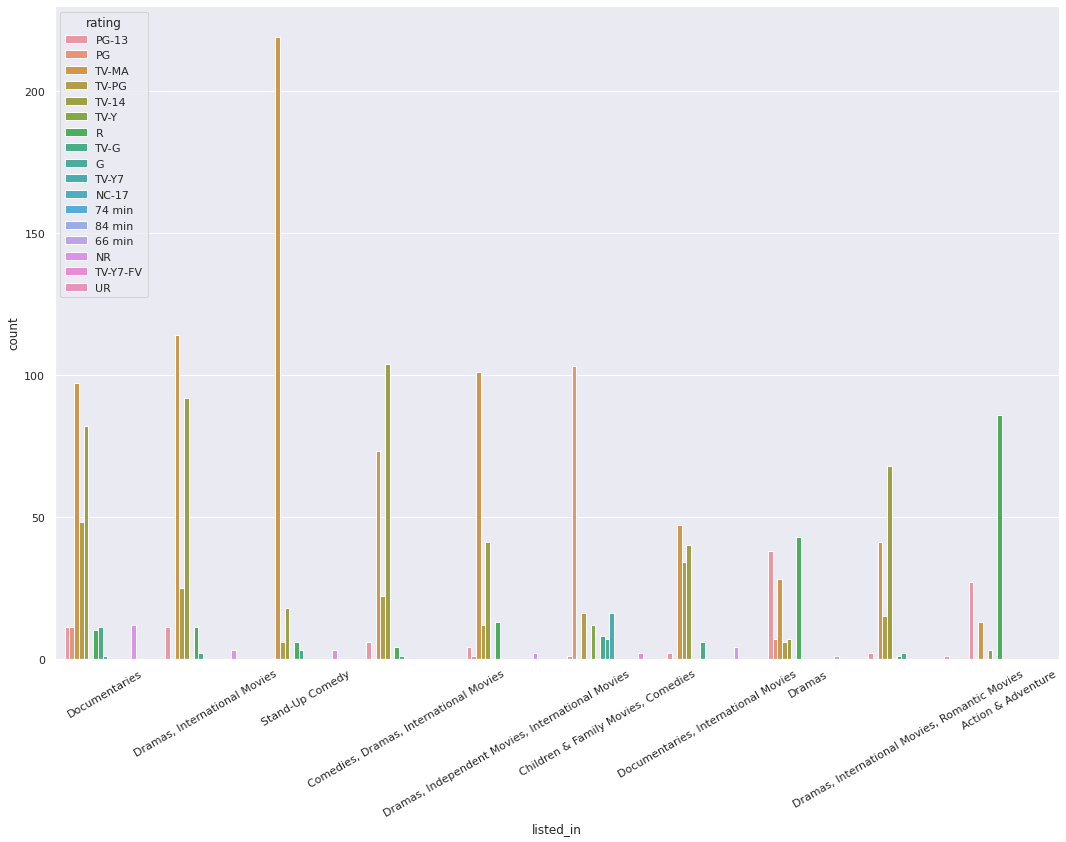

In [45]:
sns.set()
plt.figure(figsize=(18,12))
sns.countplot(x='listed_in',hue='rating',data = df_movies,order =df_movies["listed_in"].value_counts().index[0:10])
plt.xticks(rotation = 30)
plt.show()

**Drama type movies are mostly rated by TV-MA**

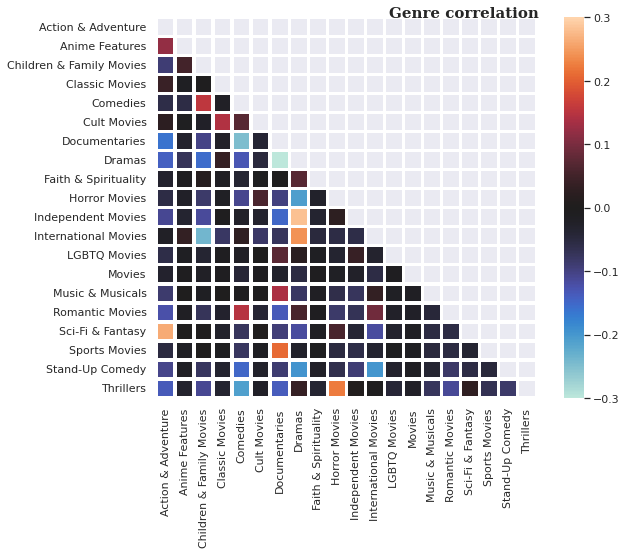

In [46]:
from sklearn.preprocessing import MultiLabelBinarizer 


df_movies['genre'] = df_movies['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
Types = []
for i in df_movies['genre']: Types += i 
Types = set(Types)
test = df_movies['genre']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
pl = sns.heatmap(corr, mask=mask, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
plt.show()

**Independant Movies and Drama's are the strongest correlated movie genre's followed by Scifi&Fantasy and Action and adventure**

## 1.3 Actos and Directors

### 1.3.1 Missing directors

In [48]:
df_movies.isna().sum()

show_id             0
type                0
title               0
director           97
cast              354
country           168
date_added          0
release_year        0
rating              1
duration            3
listed_in           0
description         0
titleType           0
primaryTitle        0
originalTitle       0
isAdult             0
startYear           0
endYear             0
runtimeMinutes      0
genres              0
averageRating       0
numVotes            0
genre               0
dtype: int64

**There are 97 missing directors**

### 1.3.2 Director counts: Before vs After filling data

### 1.3.3 Best director